
# Objective:

The hypothetical app provides job matching services based on users’ personalities. The company is optimizing for collecting as many user personality data as possible by having users to complete Myers Briggs personality tests. The project should be completed within 2 hours.

## Goal: 
optimize user acquisition through online advertisement strategies. 

A few assumptions here:
1. we are assuming that these 1000 users represent the entire population of the company's userbase in every country
2. assuming that quizzes are sequential. You cannot complete the second quiz without completing the first

In [1]:
import pandas as pd
import numpy as np



In [3]:

### Graphing
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# Plot within the jupyter notebook
%matplotlib inline
# Basically, the HD version
%config InlineBackend.figure_format = 'retina'


In [4]:
df = pd.read_csv('/Users/KerryChowChow/Data_Science_portfolio/Online_ad_acquisition/MOCK_DATA.csv')

In [5]:
df.head(2).T

,0,1
id,1,2
first_name,Charles,Sara
last_name,Garza,Castillo
email,cgarza0@hexun.com,scastillo1@blogspot.com
platform,ios,ios
country,China,China
referrer,sbwire.com,ucoz.com
acquisition cost,$0.34,$1.85
days since install,13,9
registration,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
id                    1000 non-null int64
first_name            1000 non-null object
last_name             1000 non-null object
email                 1000 non-null object
platform              1000 non-null object
country               1000 non-null object
referrer              1000 non-null object
acquisition cost      1000 non-null object
days since install    1000 non-null int64
registration          1000 non-null int64
app launch            1000 non-null int64
complete quiz 1       1000 non-null int64
complete quiz 2       1000 non-null int64
complete quiz 3       1000 non-null int64
complete quiz 4       1000 non-null int64
complete quiz 5       1000 non-null int64
people checkfit       1000 non-null int64
company checkfit      1000 non-null int64
invite friend         1000 non-null int64
share app             1000 non-null int64
profile view          1000 non-null int64
compa

In [14]:
# convert acquisition cost to number
df['acquisition cost'] = df['acquisition cost'].apply(lambda x: float(x[1:]))

# 1. Which countries are the cheapest for us to acquire users that complete registration?
- columns to look at: id, country, registration
1. filter registration == 1
2. groupby country, agg on acquisition cost
3. rank ascendingly by acquisition cost

In [6]:
df.registration.unique()

array([1, 0])

country
Australia           3
Canada             38
China             523
Germany             6
Italy               2
Japan              48
Mexico             42
Portugal           90
Spain              11
Ukraine            46
United Kingdom      5
United States      79
Name: acquisition cost, dtype: int64

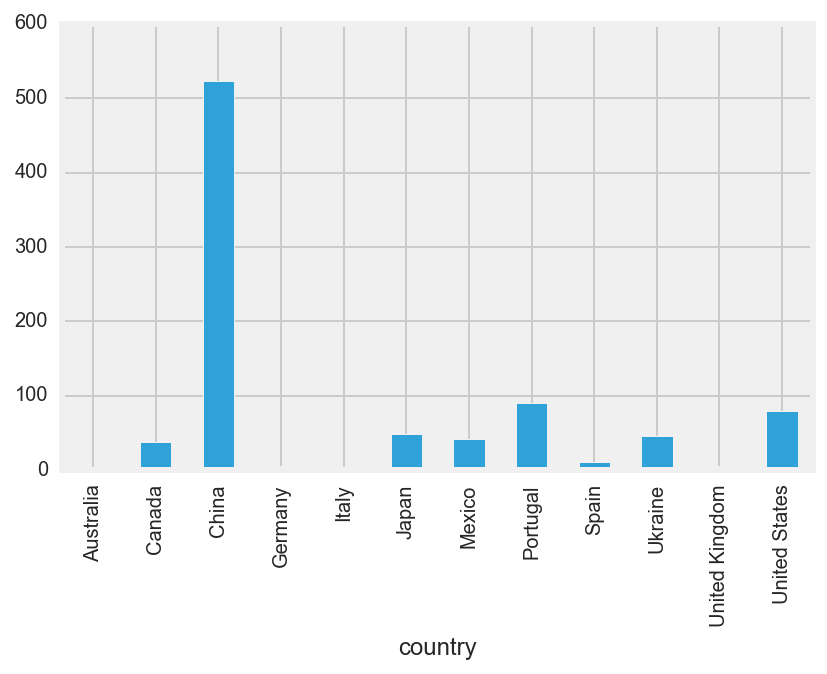

In [24]:
df[df.registration == 1].groupby(['country'])['acquisition cost'].count().plot(kind='bar')
# look at how many users we have in each country
df[df.registration == 1].groupby(['country'])['acquisition cost'].count()

In [82]:
reg_avg = df[df.registration == 1].groupby(['country'])['acquisition cost'].mean().mean()
reg_avg

2.7266600915461723

In [136]:
df[df.registration == 1].groupby(['country'])['acquisition cost'].mean().sort_values(ascending=True)

country
Canada            2.487895
Mexico            2.510952
United States     2.532532
China             2.571358
Ukraine           2.610435
Germany           2.671667
Portugal          2.681000
Italy             2.740000
Japan             2.788750
Spain             2.800000
Australia         2.813333
United Kingdom    3.512000
Name: acquisition cost, dtype: float64

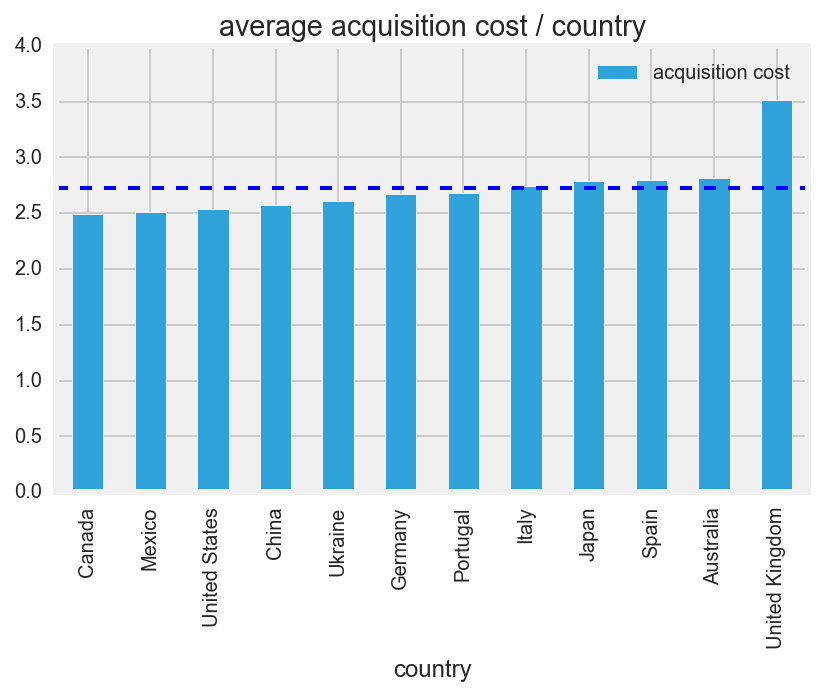

In [83]:
df[df.registration == 1].groupby(['country'])['acquisition cost'].mean().sort_values(ascending=True).plot(kind='bar', legend=True, title='average acquisition cost / country')

plt.axhline(y=reg_avg, color='b', linestyle='dashed', linewidth=2)

Comparing to the total average, it costs the most to acquire UK users (\$3.5 acquisition cost per user). It costs the least to acquire Canadian users (\$2.5 acquisition cost per user)

# 2. Suppose we want users that "will" complete all 5 quizzes. What are the top 10 cheapest countries for us to acquire users that complete all 5 quizzes?

In [33]:
mask = (df['complete quiz 1'] == 1) & (df['complete quiz 2'] == 1) & (df['complete quiz 3'] == 1) & (df['complete quiz 4'] == 1) & (df['complete quiz 5'] == 1)

In [40]:
# find users that completed all five quizzes 
df[mask].groupby(['country'])['acquisition cost'].mean().sort_values(ascending=True)
# there are only 6 rows / 6 users that have completed all 5 quizzes 
# and they come from 2 countries. 

country
China    2.802
Japan    2.960
Name: acquisition cost, dtype: float64

The result is weird if we are only filtering users that have completed 5 quizzes. There are only 6 rows / 6 users that have completed all 5 quizzes and they come from 2 countries - Japan and China.
Perhaps, we want to look at the trajectories of users from different countries completing quizzes?

In [65]:
# Look at top countries that have completed at least 4 quizzes
mask2 = (df['complete quiz 1'] == 1) & (df['complete quiz 2'] == 1) & (df['complete quiz 3'] == 1) & (df['complete quiz 4'] == 1) 

In [77]:
country_avg = df[mask2].groupby(['country'])['acquisition cost'].mean().mean()

2.4447760724124361

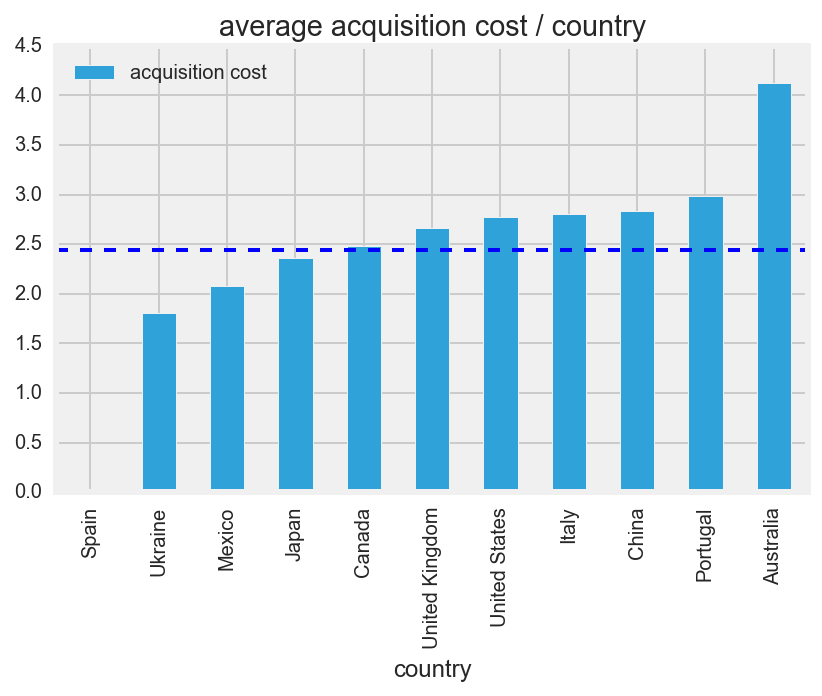

In [84]:

df[mask2].groupby(['country'])['acquisition cost'].mean().sort_values(ascending=True).plot(kind='bar',legend=True, title='average acquisition cost / country')
df[mask2].groupby(['country'])['acquisition cost'].mean().sort_values(ascending=True)
plt.axhline(y=country_avg, color='b', linestyle='dashed', linewidth=2)

The acquisition cost for Spain is \$0 which was weird. Then, it turned out that we only got one user from Spain who has completed at least 4 quizzes and the acquisition cost is $0. It's obvious that this user is an outlier that we should not use this information to generalize the entire Spain population.
- if have more time, I would build a threshold determining the # of quizzes to indicate the likelihood of completing all 5 quizzes.
- Interesting to notice how Japan is the top 4th most expensive country to acquire users. However, it is also the top 4th cheapest country to acquire users who tend to help maintain good data quality (aka complete the most quizes.)
- On the other hand, UK was the most expensive country to acquire users but they tend to complete more quizzes than countries like China or Portugal. 

In [73]:
df[mask2][df[mask2].country == 'Spain']


,id,first_name,last_name,email,platform,country,referrer,acquisition cost,days since install,registration,...,complete quiz 5,people checkfit,company checkfit,invite friend,share app,profile view,company view,create a team,join a team,abg_checkfit_day
356,357,Harold,Shaw,hshaw9w@who.int,android,Spain,deviantart.com,0.0,9,1,...,0,13,13,11,5,20,20,4,3,1.444444


# 3. How many times should we expect a user to complete "people checkfit" per day?
- "people checkfit" is a new feature to increase the amount of time users would stay on the app. We want to see if people are actually using the new feature
- look at 'people checkfit' and "days since install"
- aggregate all # of "people checkfit" then devide that by "days sicne install" to get the average numbers of "people checkfit" per day since they registered. 

In [11]:
df.shape

(1000, 25)

In [15]:
df[df['people checkfit'] == 0].id.count()
# all the users have used the new feature since they registered

0

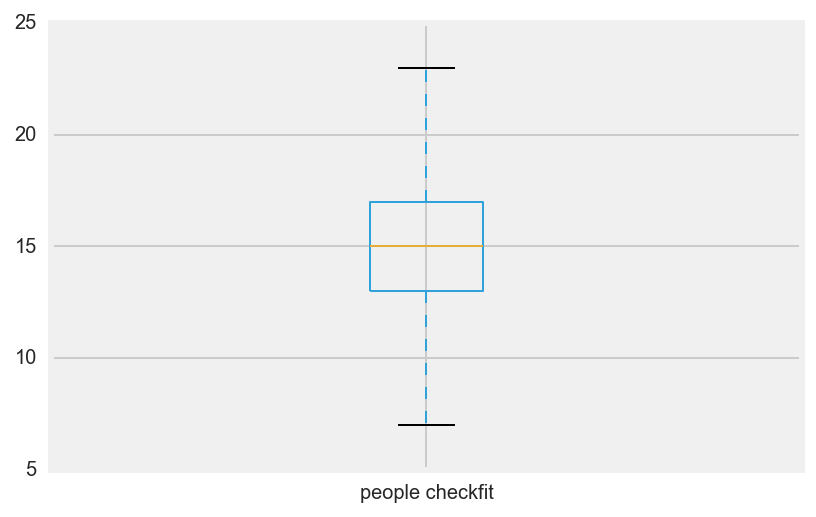

In [19]:

df['people checkfit'].plot(kind='box')

In [20]:
df['people checkfit'].describe()

count    1000.000000
mean       14.952000
std         2.990759
min         5.000000
25%        13.000000
50%        15.000000
75%        17.000000
max        24.000000
Name: people checkfit, dtype: float64

The total number of time using the new feature ranges from 5 times to 24 times.



In [6]:
(df['people checkfit'].sum())

14952

In [7]:
(df['days since install'].sum())

9933

In [8]:
df['avg_checkfit_day'] = df['people checkfit'].div(df['days since install'], axis='index')

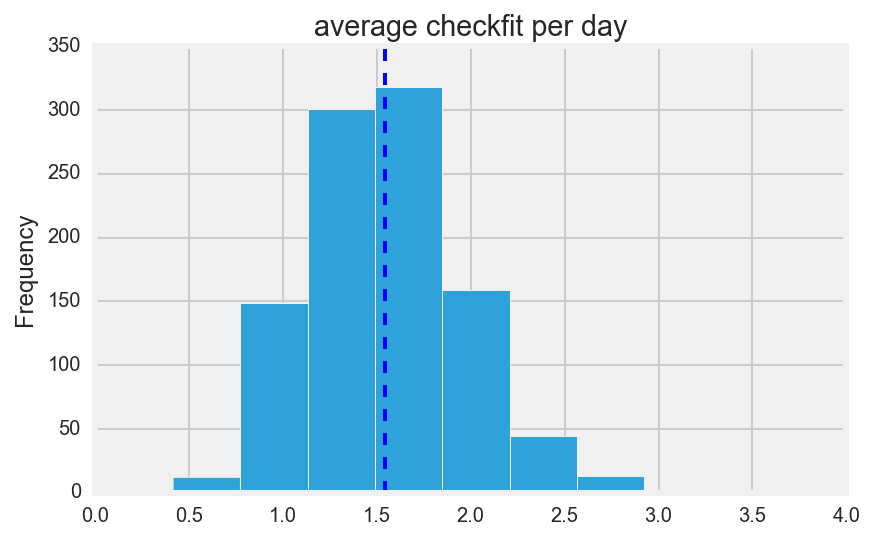

In [9]:
df['avg_checkfit_day'].plot(kind='hist', title = 'average checkfit per day')
plt.axvline(df['avg_checkfit_day'].mean(), color='b', linestyle='dashed', linewidth=2)

Yes, users are engaging with our app with the new feature. On average, users use the new feature at least once a day.

# 4. The first milestone we want our users to hit is completing the first quiz. 
1. What's the average rate that users complete the first quiz? 
2. For users who have completed the first quiz, are they more likely, less likely, or equally likely to invite a friend?

Assuming that we are comparing users who have completed the first quiz vs users who did not complete the first quiz

In [90]:
# average rate of a user completing the first quiz
df[df['complete quiz 1'] == 1]['id'].count()

894

In [98]:
print "about " + str((894.0/1000.0)*100) + "%" + " of users have completed the first quiz"

about 89.4% of users have completed the first quiz


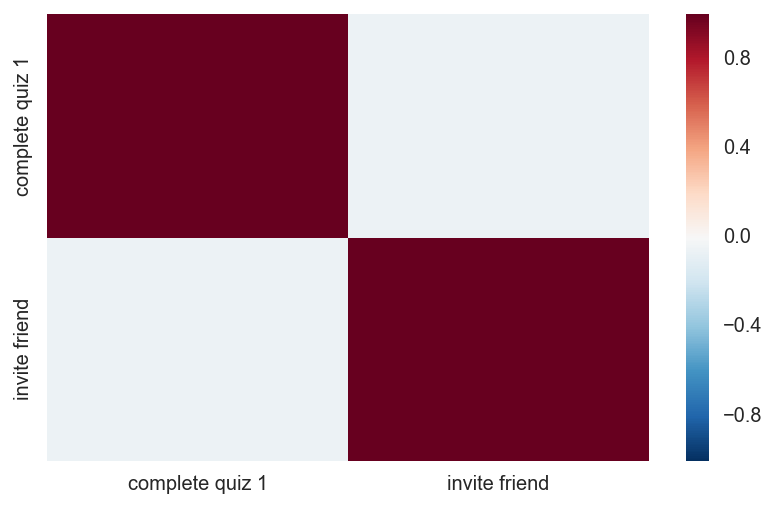

In [109]:
sns.heatmap((df[['complete quiz 1', 'invite friend']].corr()))

In [110]:
(df[['complete quiz 1', 'invite friend']].corr())

,complete quiz 1,invite friend
complete quiz 1,1.000000,-0.057449
invite friend,-0.057449,1.000000


In [112]:
df.groupby(['complete quiz 1'])['invite friend'].mean()
# it seems like both typs of users invite the same amount of friends on average.

complete quiz 1
0    10.613208
1    10.059284
Name: invite friend, dtype: float64

Out of all the registered users, about 89.4% of users have completed the first quiz (start providing data / using the app). Surprisingly, there is no correlation between completing the first quiz and inviting friends to download the app. Given the incentive structure of the app (you get “virtual tokens” by both inviting friends and completing tests), perhaps some people find it more effortless to acquire virtual tokens by inviting friends than giving out their personality data. Either way is helpful for growing the app’s user base. 